In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib tk

In [2]:
result = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash")

In [3]:
result.describe()

,finalCash_realVol,finalCash_pricingVol
count,10000.000000,10000.000000
mean,6.812189,6.840533
std,0.799375,4.512137
min,2.686210,-1.447010
25%,6.215210,3.296137
50%,6.834345,6.286845
75%,7.403785,9.900232
max,10.223900,24.636100


In [4]:
result_change3 = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_dayilyChange3")

In [5]:
result_change3.describe()

,finalCash_realVol,finalCash_pricingVol
count,10000.000000,10000.000000
mean,6.773096,6.837442
std,0.801981,4.485217
min,3.110970,-1.473140
25%,6.196218,3.318353
50%,6.784180,6.290355
75%,7.376510,9.983478
max,10.364400,22.495300


In [6]:
result_change1 = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_dayilyChange1")

In [7]:
result_change1.describe()

,finalCash_realVol,finalCash_pricingVol
count,10000.000000,10000.000000
mean,6.894103,6.804003
std,0.821478,4.599082
min,3.666260,-1.402120
25%,6.281583,3.158913
50%,6.918155,6.202150
75%,7.500350,9.911380
max,11.487500,27.826600


In [8]:
result_change10 = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_dayilyChange10")

In [9]:
result_change10.describe()

,finalCash_realVol,finalCash_pricingVol
count,10000.000000,10000.000000
mean,6.751269,6.784468
std,0.799553,4.395134
min,3.112540,-1.503540
25%,6.165415,3.326835
50%,6.765220,6.204805
75%,7.352615,9.784408
max,10.336300,24.181900


In [10]:
result_change1_1mm = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_dayilyChange1_1mm")

In [11]:
result_change1_1mm.describe()

,finalCash_realVol,finalCash_pricingVol
count,1000000.000000,1000000.000000
mean,6.882526,6.886676
std,0.813270,4.600392
min,2.465740,-1.610920
25%,6.272090,3.240818
50%,6.896380,6.329300
75%,7.485950,10.033200
max,13.005200,30.379700


In [12]:
daily_hedge = pd.read_csv("/home/lin/git/2018_term_experiment/daylyPositionHedged_dailyChange1", header=None)

In [13]:
daily_hedge.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,-0.015749,-0.006806,-0.023062,-0.012631,-0.017733,-0.026240,0.018648,-0.053272,0.013734,-0.139077,...,2.842170e-14,0.000000e+00,0.000000e+00,-2.842170e-14,-2.842170e-14,2.842170e-14,2.842170e-14,-2.842170e-14,-2.842170e-14,NaN
1,-0.019559,-0.010347,-0.015075,-0.018340,-0.009037,-0.043192,-0.015559,-0.062017,-0.001222,0.171598,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,-0.011027,0.022050,-0.013084,-0.009474,-0.023059,-0.008001,-0.021667,-0.022919,0.077595,-0.014600,...,8.475440e-18,-2.963270e-24,4.704420e-23,-1.805780e-32,1.475980e-31,-3.903940e-46,1.652840e-44,-1.152680e-96,1.663500e-95,NaN
3,0.033895,0.058702,0.054279,0.312520,0.040862,0.099711,-0.017803,0.049915,-0.023203,0.001204,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
4,0.009043,0.062858,-0.000249,0.087348,-0.007817,0.014168,-0.023162,-0.012546,-0.017789,0.031707,...,-1.402360e-01,-1.075100e-01,2.377620e-02,-9.934300e-02,2.681030e-02,-8.318950e-02,2.525370e-02,-2.850010e-02,5.396810e-03,NaN


In [14]:
abs(daily_hedge).head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,0.015749,0.006806,0.023062,0.012631,0.017733,0.026240,0.018648,0.053272,0.013734,0.139077,...,2.842170e-14,0.000000e+00,0.000000e+00,2.842170e-14,2.842170e-14,2.842170e-14,2.842170e-14,2.842170e-14,2.842170e-14,NaN
1,0.019559,0.010347,0.015075,0.018340,0.009037,0.043192,0.015559,0.062017,0.001222,0.171598,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,0.011027,0.022050,0.013084,0.009474,0.023059,0.008001,0.021667,0.022919,0.077595,0.014600,...,8.475440e-18,2.963270e-24,4.704420e-23,1.805780e-32,1.475980e-31,3.903940e-46,1.652840e-44,1.152680e-96,1.663500e-95,NaN
3,0.033895,0.058702,0.054279,0.312520,0.040862,0.099711,0.017803,0.049915,0.023203,0.001204,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
4,0.009043,0.062858,0.000249,0.087348,0.007817,0.014168,0.023162,0.012546,0.017789,0.031707,...,1.402360e-01,1.075100e-01,2.377620e-02,9.934300e-02,2.681030e-02,8.318950e-02,2.525370e-02,2.850010e-02,5.396810e-03,NaN


In [15]:
avg_hedging = abs(daily_hedge).mean()

In [16]:
pd.set_option('display.max_rows', None)  

avg_hedging

In [18]:
pricingVolHedge = list()
realVolHedge = list()
for i in range(504):
    if i % 2 == 1:
        pricingVolHedge.append(avg_hedging[i])
    else:
        realVolHedge.append(avg_hedging[i])
        

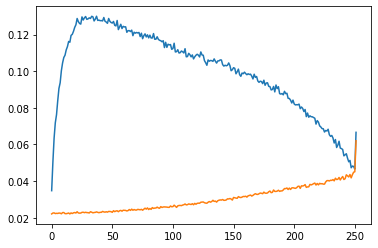

In [21]:
plt.plot(pricingVolHedge)
plt.plot(realVolHedge)

In [2]:
hedgeTwicePerDay = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_twoHedgePerDay_1mm")
hedgeTwicePerDay.describe()

,finalCash_realVol,finalCash_pricingVol
count,1000000.000000,1000000.000000
mean,6.879802,6.875427
std,0.666377,4.566626
min,3.272040,-1.724950
25%,6.341400,3.248937
50%,6.901210,6.335810
75%,7.415240,10.022900
max,12.803500,27.084700


In [5]:
hedgeEveryTwoDays = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_hedgeEveryTwoDay_1mm")#this is actually 100K
hedgeEveryTwoDays.describe()

,finalCash_realVol,finalCash_pricingVol
count,100000.000000,100000.000000
mean,6.883968,6.863919
std,1.147979,4.674655
min,1.839290,-1.565290
25%,6.100278,3.195490
50%,6.885125,6.227835
75%,7.649127,9.953255
max,14.383000,29.551900


In [8]:
hedge3TimesPerDay = pd.read_csv("/home/lin/git/2018_term_experiment/finalCash_hedge3TimesPerDay_1mm")#this is actually 100K
hedge3TimesPerDay.describe()

,finalCash_realVol,finalCash_pricingVol
count,100000.000000,100000.000000
mean,6.866330,6.861619
std,0.584165,4.564101
min,4.731880,-1.657100
25%,6.366150,3.237840
50%,6.886225,6.359500
75%,7.363853,10.015875
max,9.364110,26.170000


In [10]:
daily_hedge = pd.read_csv("/home/lin/git/2018_term_experiment/daylyClose_252Days", header=None)
daily_hedge.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,0.013778,-0.003079,0.121905,0.289034,0.134013,0.259004,0.116067,0.281821,0.099996,0.356928,...,13.68380,8.30441,13.75710,8.30754,13.76070,8.30769,13.76120,8.30845,13.76180,NaN
1,0.025618,0.004443,0.083258,-0.033482,0.181305,0.538931,0.290699,0.768916,0.287401,0.912757,...,10.23820,6.01594,10.27460,6.25538,10.24420,6.28613,10.26660,6.28770,10.26740,NaN
2,-0.009773,-0.004272,0.215811,0.212530,0.368219,0.087124,0.584474,-0.113375,0.456562,0.154097,...,1.80014,8.52040,1.80014,8.52040,1.80014,8.52040,1.80014,8.52040,1.80014,NaN
3,0.068742,0.035987,0.049518,0.060202,0.033601,0.076202,0.019307,0.096174,0.009301,0.094648,...,6.46685,8.23486,6.46685,8.23486,6.46685,8.23486,6.46685,8.23486,6.46685,NaN
4,0.067220,0.104004,0.079836,0.279922,0.102589,0.293295,0.183844,0.543294,0.202156,0.513904,...,12.10680,7.80441,12.10710,7.80441,12.10710,7.80441,12.10710,7.80441,12.10710,NaN


In [17]:
avg_hedging = (daily_hedge).std()
pricingVolHedge = list()
realVolHedge = list()
for i in range(504):
    if i % 2 == 1:
        pricingVolHedge.append(avg_hedging[i])
    else:
        realVolHedge.append(avg_hedging[i])
        

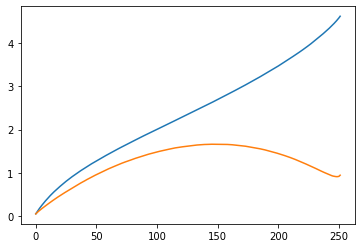

In [18]:
plt.plot(pricingVolHedge)
plt.plot(realVolHedge)

In [15]:
(daily_hedge).std()

0      0.054965
1      0.057342
2      0.083425
3      0.099735
4      0.108744
         ...   
500    0.922218
501    4.577859
502    0.948243
503    4.615975
504         NaN
Length: 505, dtype: float64

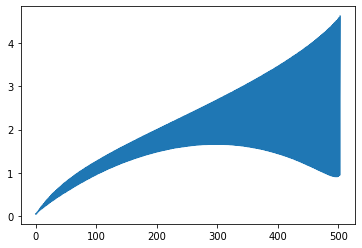

In [16]:
plt.plot((daily_hedge).std())